# Data Science and Business Analytics

# Task-5:  Traffic sign classification/Recognition system


## By Kranthi Kumar Talluri

This dataset have images of traffic signs and the goal is to train a Deep Network to classify them.

There are many Datasets available on internet. so, choose the data which is best for your network

The dataset contains 43 different classes of images.

## Import Libraries and Dataset

In [1]:
import pickle
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random


Dividing the Dataset into 3 separate files ( train.p, valid.p and test.p)


In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

## Image Exploration

36

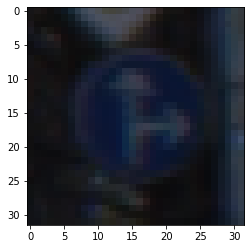

In [6]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

## Data Preparation

In [7]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [8]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 


Normalizing the Data for improving performance of the Network


In [9]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

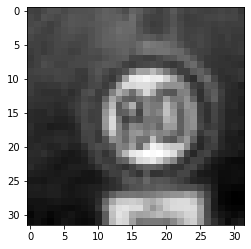

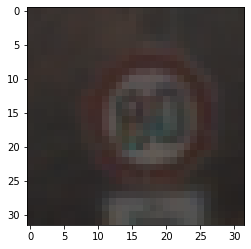

In [11]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


## Model Training

Model consist of following layers:

---------------------------------------------------
The first convolutional layer-1

Input = 32x32x1

Output = 28x28x6

Applied RELU Activation function to the output

pooling for input, Input = 28x28x6 and Output = 14x14x6

-----------------------------------------------

The first convolutional layer-2

Input = 14x14x6

Output = 10x10x16

Applied RELU Activation function to the output

Pooling with Input = 10x10x16 and Output = 5x5x16

---------------------------------------------------

Flatten the network with Input = 5x5x16 and Output = 400

---------------------------------------------------


Fully Connected layer with Input = 400 and Output = 120

Applied RELU Activation function to the output

---------------------------------------------------

Another Fully Connected Layer with Input = 120 and Output = 84

Applied RELU Activation function to the output

---------------------------------------------------

Fully Connected layer with Input = 84 and Output = 43

In [12]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [13]:
image_shape = X_train_gray[i].shape

In [14]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [15]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [16]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 13s 180ms/step - loss: 3.1310 - accuracy: 0.1743 - val_loss: 2.7581 - val_accuracy: 0.2950
Epoch 2/50
70/70 [==============================] - 12s 177ms/step - loss: 1.6853 - accuracy: 0.5275 - val_loss: 1.5242 - val_accuracy: 0.5569
Epoch 3/50
70/70 [==============================] - 12s 176ms/step - loss: 0.9876 - accuracy: 0.7127 - val_loss: 1.1543 - val_accuracy: 0.6610
Epoch 4/50
70/70 [==============================] - 12s 174ms/step - loss: 0.7207 - accuracy: 0.7907 - val_loss: 0.9848 - val_accuracy: 0.6943
Epoch 5/50
70/70 [==============================] - 12s 175ms/step - loss: 0.5782 - accuracy: 0.8345 - val_loss: 0.8627 - val_accuracy: 0.7444
Epoch 6/50
70/70 [==============================] - 12s 175ms/step - loss: 0.4714 - accuracy: 0.8647 - val_loss: 0.8292 - val_accuracy: 0.7621
Epoch 7/50
70/70 [==============================] - 12s 175ms/step - loss: 0.4059 - accuracy: 0.8876 - val_loss: 0.7437 - val_accuracy: 0.7837

## Model Evaluation

In [17]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8259


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

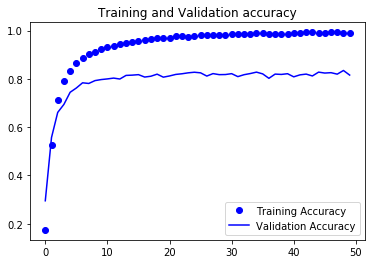

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


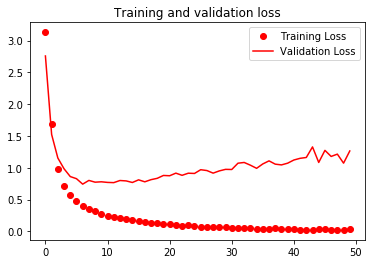

In [20]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


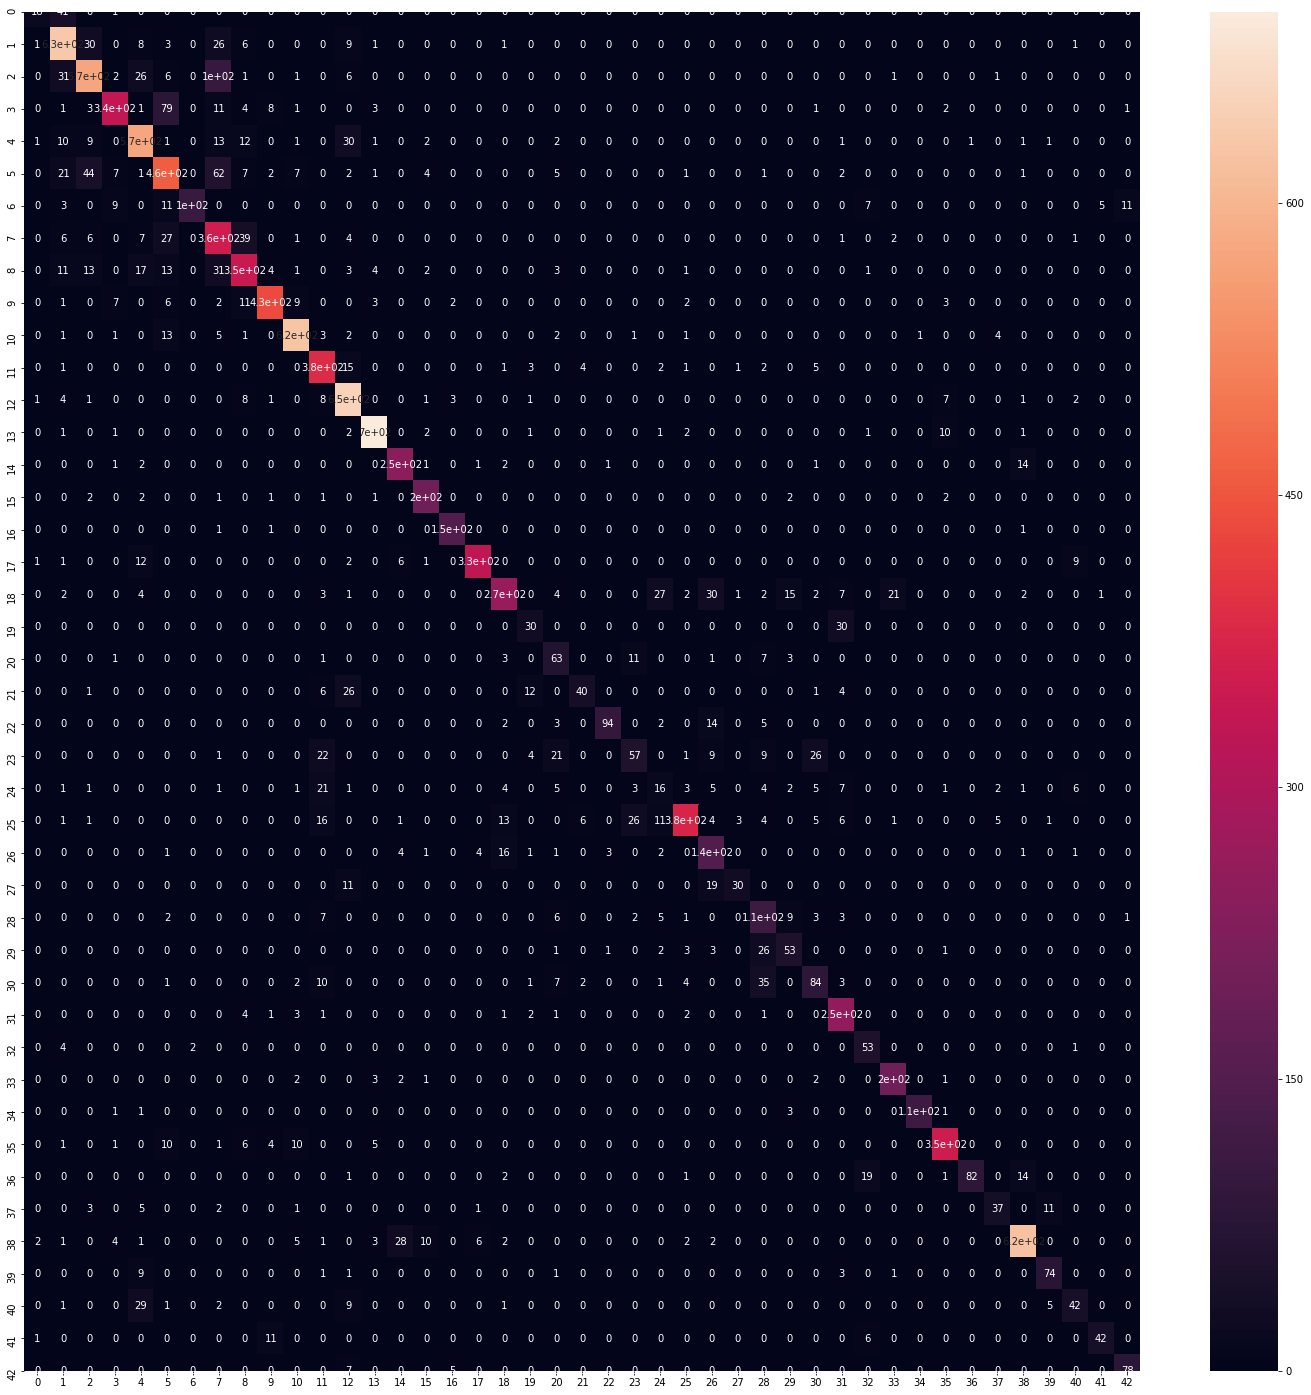

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

Model is predicting really well and only few images are not classified exactly. This can be improved by increasing the hidden layers, varing the batch size and also number of epochs

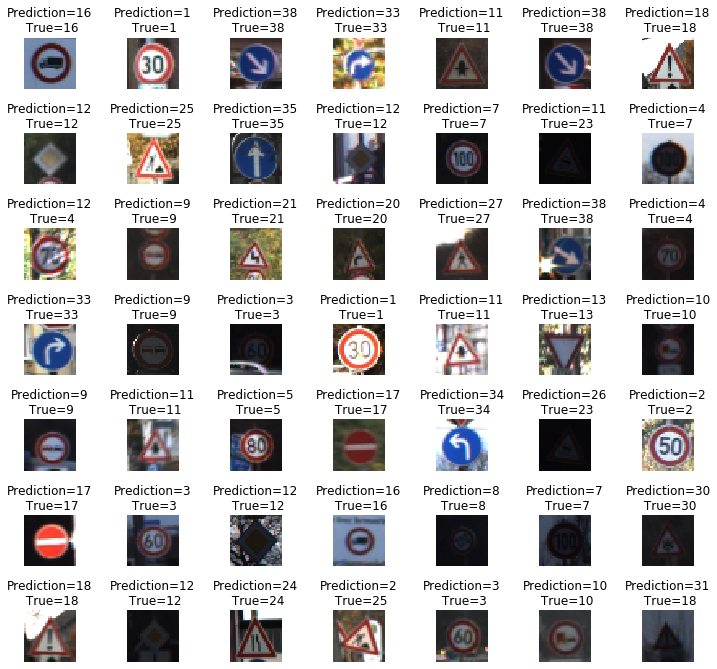

In [23]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)